In [1]:
import numpy as np
import pandas as pd
import scipy
import os
import math
import matplotlib.pyplot as plt
import functools
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import calinski_harabasz_score as CH
from sklearn import decomposition
from sklearn.cluster import KMeans,qMeans_
from sklearn.QuantumUtility.Utility import *
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('kddcup.data_10_percent_corrected',header = None)
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [3]:
obj_df = df.select_dtypes(include=['object']).copy()

obj_df[1] = obj_df[1].astype('category')
obj_df[2] = obj_df[2].astype('category')
obj_df[3] = obj_df[3].astype('category')

In [4]:
d1 = dict(enumerate(obj_df[1].cat.categories))

d2 = dict(enumerate(obj_df[2].cat.categories))

d3 = dict(enumerate(obj_df[3].cat.categories))

d1

{0: 'icmp', 1: 'tcp', 2: 'udp'}

In [5]:
df_=df.copy()

In [6]:
df[1] = obj_df[1].cat.codes
df[2] = obj_df[2].cat.codes
df[3] = obj_df[3].cat.codes



In [8]:
df1_ = df.drop(columns=41)
df1_

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0,1,22,9,181,5450,0,0,0,0,...,9,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0,1,22,9,239,486,0,0,0,0,...,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0,1,22,9,235,1337,0,0,0,0,...,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,1,22,9,219,1337,0,0,0,0,...,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0,1,22,9,217,2032,0,0,0,0,...,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0,1,22,9,282,2286,0,0,0,0,...,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0,1,22,9,203,1200,0,0,0,0,...,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0,1,22,9,291,1200,0,0,0,0,...,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [9]:
scaler = MinMaxScaler()
for (columnName, columnData) in df1_.iteritems():
    df1_[columnName] = scaler.fit_transform(df1_[[columnName]])
df1_

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,0.0,0.5,0.338462,0.9,2.610418e-07,0.001057,0.0,0.0,0.0,0.0,...,0.035294,0.035294,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0
1,0.0,0.5,0.338462,0.9,3.446905e-07,0.000094,0.0,0.0,0.0,0.0,...,0.074510,0.074510,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
2,0.0,0.5,0.338462,0.9,3.389216e-07,0.000259,0.0,0.0,0.0,0.0,...,0.113725,0.113725,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0.0,0.5,0.338462,0.9,3.158461e-07,0.000259,0.0,0.0,0.0,0.0,...,0.152941,0.152941,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
4,0.0,0.5,0.338462,0.9,3.129617e-07,0.000394,0.0,0.0,0.0,0.0,...,0.192157,0.192157,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0.0,0.5,0.338462,0.9,4.470881e-07,0.000365,0.0,0.0,0.0,0.0,...,0.337255,1.000000,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494017,0.0,0.5,0.338462,0.9,4.067060e-07,0.000443,0.0,0.0,0.0,0.0,...,0.023529,1.000000,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494018,0.0,0.5,0.338462,0.9,2.927706e-07,0.000233,0.0,0.0,0.0,0.0,...,0.062745,1.000000,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494019,0.0,0.5,0.338462,0.9,4.196859e-07,0.000233,0.0,0.0,0.0,0.0,...,0.101961,1.000000,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [10]:
df1_.isnull().values.any()

False

In [10]:
pca = decomposition.PCA(svd_solver="full",n_components=1)

pca_model = pca.fit_transform(df1_)
pca_model

array([[0.47478448],
       [0.48268036],
       [0.47639648],
       ...,
       [0.27138033],
       [0.19957361],
       [0.12776903]])

In [12]:
result = []
k = []
for i in np.arange(10,110,10):
    print(i)
    kmeans = KMeans(n_clusters=i,n_jobs=-1).fit(pca_model)
    k.append(i)
    result.append(CH(pca_model, kmeans.labels_))

plt.bar(k,result)
plt.xlabel('n_clusters')
plt.ylabel('CH values')
#plt.axhline(y=0.5)
plt.savefig('CH.pdf')

10
20
30
40
50
60
70
80
90
100


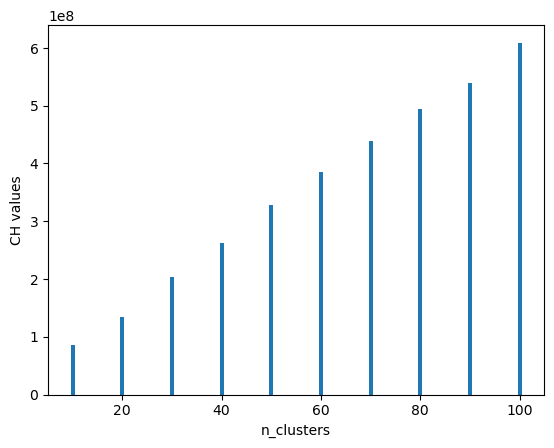

In [13]:
plt.show()

# Qpca + Dmeans

In [11]:
qPca = decomposition.qPCA(svd_solver="full")
q = qPca.fit(df1_ ,theta_estimate=True, eps_theta=3, p=1,
                          estimate_all=True, delta=0.1, eps=3,
                          true_tomography=True, stop_when_reached_accuracy=False,
                          eta=0.31, faster_measure_increment=1000,spectral_norm_est=False)

Ok_theta
0.5 0.15281644943929584


In [12]:
new_matrix = q.transform(df1_,classic_transform=False,use_classical_components=False)

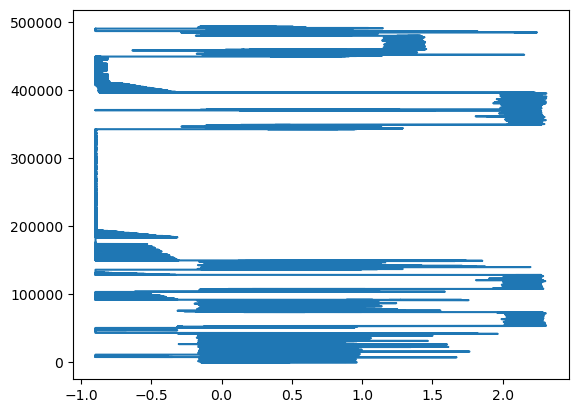

In [13]:
plt.plot(new_matrix,np.arange(0,len(new_matrix)))
plt.show()

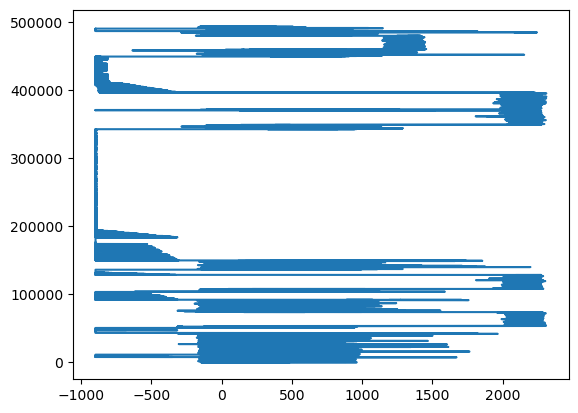

array([[474.84576307],
       [482.67927857],
       [476.34430145],
       ...,
       [270.82961202],
       [199.13632019],
       [127.39785917]])

In [14]:
new_matrix_1 = new_matrix * 1000
plt.plot(new_matrix_1,np.arange(0,len(new_matrix_1)))
plt.show()
new_matrix_1

10
9630669.043175347 139.559527641961
0.0 139.559527641961
13886571.096440455 139.559527641961
0.0 139.559527641961
10736486.976287974 139.559527641961
0.0 139.559527641961
13898802.095826667 139.559527641961
0.0 139.559527641961
13897394.643098041 139.559527641961
0.0 139.559527641961
13748885.84715562 139.559527641961
0.0 139.559527641961
13760497.608817236 139.559527641961
0.0 139.559527641961
12803131.01327882 139.559527641961
0.0 139.559527641961
13320460.457356235 139.559527641961
0.0 139.559527641961
13759655.60718255 139.559527641961
0.0 139.559527641961
20
28760010.61833777 139.559527641961
0.0 139.559527641961
28693084.24057447 139.559527641961
0.0 139.559527641961
29860007.84551046 139.559527641961
0.0 139.559527641961
29927881.310918204 139.559527641961
0.0 139.559527641961
29715000.18285957 139.559527641961
0.0 139.559527641961
24821439.344368532 139.559527641961
0.0 139.559527641961
34423812.23079187 139.559527641961
0.0 139.559527641961
29124259.106485955 139.55952764196

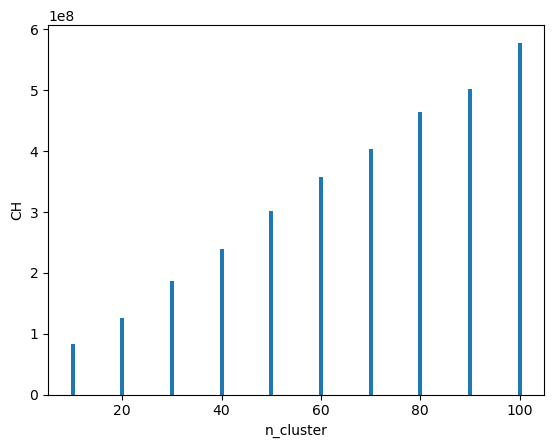

In [18]:
result = []
k = []

for i in np.arange(10,110,10):
    print(i)
    dmeans = qMeans_(n_clusters=i,algorithm='full',delta=0.0005,intermediate_error=True,true_distance_estimate=False).fit(new_matrix_1)

    k.append(i)
    result.append(CH(new_matrix_1, dmeans.labels_))

plt.bar(k,result)
plt.xlabel('n_cluster')
plt.ylabel('CH')
plt.show()
#plt.axhline(y=0.5)